# IN4080 – Natural Language Processing

The assignment has two parts:
* Part A: Texts and frequencies
* Part B: Text classification

In [3]:
import nltk
from nltk.book import *
from nltk.corpus import brown

## Part A: Texts and frequencies

### Exercise 1 – Conditional frequency distributions


Introdution

**a)** 
Conduct a similar experiment as the one mentioned above with the genres: news, religion,
government, fiction, romance as conditions, and occurrences of the words: he, she, her, him,
as events. Make a table of the conditional frequencies and deliver code and table.

In [4]:
genres = ['news', 'religion','government', 'fiction', 'romance']
pronouns = ['he', 'she', 'her', 'him']

cfd = nltk.ConditionalFreqDist((genre, word)
                            for genre in genres
                            for word in brown.words(categories=genre))
cfd.tabulate(samples=pronouns)

            he she her him 
   fiction 813 280 397 375 
government 120   0   3  25 
      news 451  42 103  93 
  religion 137  10   8  60 
   romance 702 496 651 339 


**b)** Answer in words what you see. How does gender vary with the genres?

**c)** 

In [5]:
genders = ['Male','Female']

cfd = nltk.ConditionalFreqDist()
for word in brown.words():
    word = word.lower()
    if word == 'he' or word == 'him':
        cfd[genders[0]][word] += 1
    if word == 'she' or word == 'her':
        cfd[genders[1]][word] += 1

In [6]:
cfd.tabulate(samples = pronouns)

         he  she  her  him 
Female    0 2860 3036    0 
  Male 9548    0    0 2619 


In [7]:
sum_freq = 0

for gender in cfd:
    for pro in cfd[gender]:
        sum_freq += cfd[gender][pro]

male_rel_freq = cfd['Male']['him']/sum_freq
female_rel_freq = cfd['Female']['her']/sum_freq

print(f'Relative frequency of him: {male_rel_freq:3.4f}')
print(f'Relative frequency of her: {female_rel_freq:3.4f}')

Relative frequency of him: 0.1450
Relative frequency of her: 0.1681


We can see here that the objective form of the feminine pronoun is relatively
more frequent than the objective form of the male pronoun. Bla bla bla------...

**d)**  

In [8]:
#chose to have universal pos tags
tag_brown = [x for x in brown.tagged_words(tagset='universal')]

genders = ['Male','Female']
pers_pronoun = ['she','he','her','him']
poss_pronoun = ['her','his','hers']

total_pronoun = set(pers_pronoun + poss_pronoun )

In [9]:
cfd_new = nltk.ConditionalFreqDist()

def make_cfd(list_of_pronoun, type_of_pronoun):
    for i in range(len(tag_brown)):
        word = tag_brown[i][0].lower()
        if word in list_of_pronoun and tag_brown[i][1] == type_of_pronoun:
            cfd_new[tag_brown[i][1]][word] += 1
make_cfd(pers_pronoun,'PRON')
make_cfd(poss_pronoun,'DET')

In [10]:
cfd_new.tabulate(samples = total_pronoun)

      him hers  his   he  she  her 
 DET    0    0 6957    0    0 1929 
PRON 2619    0    0 9546 2860 1107 


**e)**

**f)** Illustrate the numbers from (d) with a bar chart.

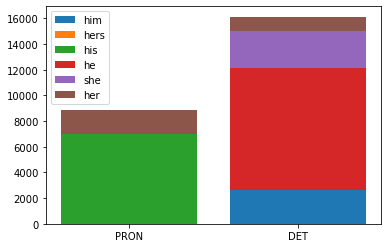

In [11]:
import numpy as np
import matplotlib.pyplot as plt

xticks = cfd_new.keys()
x = np.arange(0, len(cfd_new.keys()))
height = np.zeros(len(cfd_new.keys()))

for i, p in enumerate(total_pronoun):
    y = []    
    for j, genre in enumerate(['DET','PRON']):
        y.append(cfd_new[genre][p])
    plt.bar(x, y, label=p, bottom=height)
    height += y

plt.xticks(np.arange(0, len(xticks)), xticks)
plt.legend()
plt.show()

**g)**

## Exercise 2 – Downloading texts and Zipf’s law

In [12]:
from urllib import request
url = "https://www.gutenberg.org/files/74/74-0.txt"
response = request.urlopen(url)
raw_data = response.read().decode('utf-8')

**b)** We want to remove the unnecarrary data, in this the extra headlines. bla bla bla bla..........

In [13]:
#splitting the raw_data into a list.
raw_data_list = raw_data.split()

#finding the deleting indecies, ego. "***"
delete_start = [i for i in range(len(raw_data_list)) if raw_data_list[i] == '1876.']
delete_end = [i for i in range(len(raw_data_list)) if raw_data_list[i] == '***'] 

#slicing out the extra headlines. 
raw_data_list = raw_data_list[delete_start[0]+1:delete_end[2]]

**c)** Tokenizing the data. Removing the punctuation marks ... bla bla bla.........
Should you case fold the text?

In [14]:
# tokenizing the data
token_data = nltk.word_tokenize(' '.join([str(w) for w in raw_data_list]))
words = []
numbers = []
punc_marks = []
other_tokens = []

punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—'
for word in token_data:
    word = word.lower()
    if word.isalpha():
        words.append(word)
    elif word.isdigit():
        numbers.append(word)
    elif word in punctuation: 
        punc_marks.append(word)
    else:
        other_tokens.append(word)

Printing the different lists just to see how the elements look like.

In [15]:
def print_lists(the_list):
    for l in the_list[0:50]:
        print(l,end=' ')
    print(" ")
print_lists(words)
print_lists(numbers)
print_lists(punc_marks)
print_lists(other_tokens)

chapter i tom no answer tom no answer what s gone with that boy i wonder you tom no answer the old lady pulled her spectacles down and looked over them about the room then she put them up and looked out under them she seldom or never looked them  
2 2 2 2 2 2 2 2 2  
! . ! . , ? ! . ; . ; , , , . , , , : , , , . . ! . . : ! . ! . ? ! . . ? , , . . . ! , ! , . , , .  
“ ” “ ” “ ’ ” _through_ “ ” service—she stove-lids “ ’ ll— ” “ ” “ ” “ y-o-u-u ” “ ’ ’ ” “ nothing. ” “ _is_ ” “ ’ aunt. ” “ ’ jam—that ’ ’ ’ ’ switch. ” air—the desperate— “ ”  


We can see that the list for "other_tokens" contains a lot of words, but since they have some kind som puntuation mark in it they have been putted on *other_tokens*. We have to clean these words and insert them in the correct list.

In [16]:
for _ in range(1000):
    for o in other_tokens:
        #if the token contains words with punc_mark
        if any(x.isalpha() for x in o) and any(x in punctuation for x in o):
            other_tokens.pop(other_tokens.index(o))
            for char in o:
                if char in punctuation:
                    o = o.split(char)
                    break
            o = [w for w in o if w != '']
            for w in o:    
                words.append(w)

**d)** Using the the nltk.FreqDist() to count the words.

In [17]:
freq_dist = nltk.FreqDist(words)

import itertools
import operator

sorted_freq_dist = dict(sorted(freq_dist.items(), key=operator.itemgetter(1),reverse=True))
sorted_freq_dist = dict(itertools.islice(sorted_freq_dist.items(), 20))

print("The 20 most frequent words:")
for key in sorted_freq_dist:
    print(f'{key}: {freq_dist[key]}')

The 20 most frequent words:
the: 3702
and: 3104
a: 1861
to: 1715
of: 1435
it: 1315
he: 1252
was: 1168
that: 1025
i: 1015
in: 941
you: 893
s: 845
his: 815
tom: 773
t: 678
with: 647
they: 616
but: 579
for: 525


**e)** The frequencies of frequencies.

In [18]:
freq = nltk.FreqDist()
selection = ['1 time','2-10 times', '11-50 times','51-100 times','100+ times']

for k in freq_dist:
    if freq_dist[k] == 1 :
        freq[selection[0]] += 1
    elif freq_dist[k] >= 2 and freq_dist[k] <= 10:
        freq[selection[1]] += 1
    elif freq_dist[k] >= 11 and freq_dist[k] <=50:
        freq[selection[2]] += 1
    elif freq_dist[k] >= 51 and freq_dist[k] <=100:
        freq[selection[3]] += 1
    else:
        freq[selection[4]] += 1

In [19]:
import pandas as pd

col_keys = []
col_values = []
for k in freq:
    col_keys.append(k)
    col_values.append(freq[k])
    
pd.DataFrame.from_dict(data = {'Words occurring:':col_keys,'Frequencies of frequencies:': col_values})

,Words occurring:,Frequencies of frequencies:
0,1 time,3549
1,2-10 times,2988
2,11-50 times,496
3,100+ times,110
4,51-100 times,85


We can see that there are alot of words that only occur one time and there are words that occur only 85 occurrences of the words that have been occured 51-100 times. Below, a plot of this table is shown.

Text(0, 0.5, 'Frequencies of frequencies')

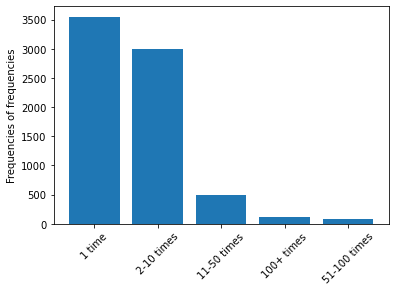

In [20]:
plt.bar(col_keys,col_values)
plt.xticks(rotation=45)
plt.ylabel("Frequencies of frequencies")

**f)** We order the words by their frequencies, the most frequent word first. We will use the same result as the task **d** for finding the 20 most frequent words.

In [21]:
#the 20 most frequent words
sorted_freq_dist = dict(itertools.islice(sorted_freq_dist.items(), 20))
ranks = range(1,21)
zipf_constant = [i*sorted_freq_dist[k] for i,k in zip(ranks,sorted_freq_dist)]
occurrences = [sorted_freq_dist[k] for k in sorted_freq_dist]

In [22]:
pd.DataFrame.from_dict(data = {'Ranks:':ranks,'Occurrences': occurrences, 'Zipf law:': zipf_constant})

,Ranks:,Occurrences,Zipf law:
0,1,3702,3702
1,2,3104,6208
2,3,1861,5583
3,4,1715,6860
4,5,1435,7175
5,6,1315,7890
6,7,1252,8764
7,8,1168,9344
8,9,1025,9225
9,10,1015,10150


**f)**

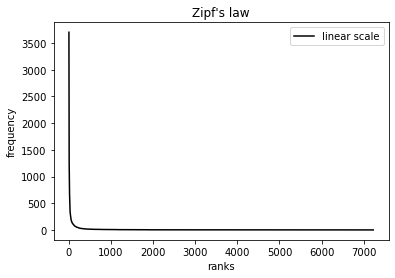

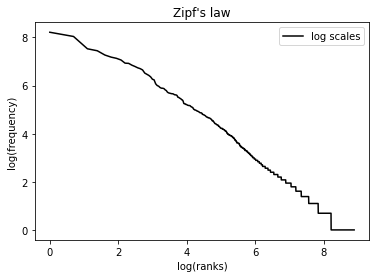

In [23]:
sorted_freq_dist = dict(sorted(freq_dist.items(), key=operator.itemgetter(1),reverse=True))
occurences = np.array([sorted_freq_dist[k] for k in sorted_freq_dist])
ranks = np.linspace(1,len(occurences), len(occurences))

plt.plot(ranks, occurences,'k',label='linear scale')
plt.xlabel('ranks')
plt.ylabel('frequency')
plt.title("Zipf's law")
plt.legend()
plt.figure()

plt.plot(np.log(ranks),np.log(occurences),'k',label='log scales')
plt.xlabel('log(ranks)')
plt.ylabel('log(frequency)')
plt.title("Zipf's law")
plt.legend()
plt.show()

## Part B: Text classification

### 1a) Inititial classifier

We will work interactively in python/ipython/Jupyter notebook. Start by importing the tools we
will be using:

In [26]:
import nltk
import random
import numpy as np
import scipy as sp
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In this task we will use Movie Reviews Corpus from the NLTK package.

In [25]:
from nltk.corpus import movie_reviews

In [27]:
raw_movie_docs = [(movie_reviews.raw(fileid), category) for
category in movie_reviews.categories() for fileid in
movie_reviews.fileids(category)]

We will shuffle the data and split it into 200 documents for final testing (which we will not use for
a while) and 1800 documents for development. Use your birth date as random seed.

In [32]:
random.seed(2920)
random.shuffle(raw_movie_docs)
movie_test = raw_movie_docs[:200]
movie_dev = raw_movie_docs[200:]

Then split the development data into 1600 documents for training and 200 for development test
set.

In [56]:
train_data = movie_dev[:1600]
dev_test_data = movie_dev[1600:]

Splitting the train_data into two lists, each of 1600 elements, the first, train_texts, containing the texts (as strings) for each document, and the train_target, containing the corresponding 1600 labels. Doing the same for dev_test_data.

In [57]:
train_texts = []
train_target = []
for text,label in train_data:
    train_texts.append(text)
    train_target.append(label)

In [68]:
dev_test_texts = []
dev_test_target = []
for text,label in dev_test_data:
    dev_test_texts.append(text)
    dev_test_target.append(label)

It is then time to extract features from the text. We import

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

We then make a CountVectorizer v. This first considers the whole set of training data, to determine
which features to extract:

In [60]:
v = CountVectorizer()
v.fit(train_texts)

CountVectorizer()

Then we use this vectorizer to extract features from the training data and the test data

In [63]:
train_vectors = v.transform(train_texts)
dev_test_vectors = v.transform(dev_test_texts)

We are now ready to train a classifier. For this task, we chose to use a multinomial naive Bayes text classifier.

In [67]:
clf = MultinomialNB()
clf.fit(train_vectors, train_target)

MultinomialNB()

We can proceed and see how the classifier will classify one test document, e.g.

In [69]:
dev_test_texts[14]
clf.predict(dev_test_vectors[14])

array(['neg'], dtype='<U3')

We can use the procedure to predict the results for all the test_data, by

In [70]:
clf.predict(dev_test_vectors)

array(['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos',
       'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg',
       'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'pos', 'neg',

We can use this for further evaluation (accuracy, recall, precision, etc.) by comparing to
dev_test_targets. Alternatively, we can get the accuracy directly by

In [71]:
clf.score(dev_test_vectors, dev_test_target)

0.855

This results in 0.855 accuracy score for a multinomial naive Bayes text classifier.

### 1b) Parameters of the vectorizer

We have so far considered the standard parameters for the procedures from scikit-learn. These procedures have, however, many parameters. To get optimal results, we should adjust the parameters.
We can use train_data for training various models and dev_test_data for testing and comparing
them.

CountVectorizer case-folds by default. For a different corpus, it could be interesting
to check the effect of this feature, but even the movie_reviews.raw() is already in lower case, so that
does not have an effect here. We could also have explored the effect of exchanging
the default tokenizer included in CountVectorizer with other tokenizers.

Another interesting feature is *binary*. Setting this to True implies only counting whether a word
occurs in a document and not how many times it occurs. It could be interesting to see the effect
of this feature.

The feature *ngram_range* = [1,1] means we use tokens (=unigrams) only, [2,2] means using bigrams
only, while [1,2] means both unigrams and bigrams, and so on.

In [107]:
def varying_paramters(ngram_range, binary):
    v = CountVectorizer(ngram_range = ngram_range, binary = binary)
    v.fit(train_texts)

    train_vectors = v.transform(train_texts)
    dev_test_vectors = v.transform(dev_test_texts)

    clf = MultinomialNB()
    clf.fit(train_vectors, train_target)
    clf.predict(dev_test_vectors)
    return clf.score(dev_test_vectors, dev_test_target)

n_gram_list = [(1,1),(1,2),(1,3)]
binary_list = [False,True]

accuracy = {binary_list[0]: [], binary_list[1]:[]}

for binary in binary_list:
    for ngram_range in n_gram_list:
        accuracy[binary].append(varying_paramters(ngram_range, binary))

In [109]:
col1 = [accuracy[binary_list[0]][0], accuracy[binary_list[1]][0]]
col2 = [accuracy[binary_list[0]][1], accuracy[binary_list[1]][1]]
col3 = [accuracy[binary_list[0]][2], accuracy[binary_list[1]][2]]

table = {n_gram_list[0]: col1, n_gram_list[1]:col2,n_gram_list[2]:col3}

df = pd.DataFrame(data = table, columns = n_gram_list)
df.index = binary_list
df

,"(1, 1)","(1, 2)","(1, 3)"
False,0.855,0.865,0.835
True,0.845,0.885,0.860


It looks like for *ngram_range* paramter for (1,1), the *binary* variable for False gives the best accuracy. But for the other values of *ngram_range*, *binary = True* gives better prediction. The conclusion of this experiment is that we get best results by using unigrams and bigrams tokens (*ngram_range*=(1, 2)), and counting whether a word occurs in a document and not how many times it occurs (*binary=True*).